# Default Payment Predictor

## Description

### Objective
`Make a Classification Model using (*) to predict default_payment_next_month status.`
<br>
`(*) note :`<br>
`1. Logistic Regression`<br>
`2. SVM`<br>
`3. Decision Tree`<br>
`4. Random Forest`<br>
`5. KNN`<br>
`6. Naive Bayes`<br>
`7. Ada Boost`<br>
`8. Gradient Boost`

### Problem Statement
`1. What are columns that able to affect the income bracket significantly ?`
<br>
`2. What is the best model so far ?`
<br>
`3. How much data is wrongly predicted ?`
<br>
`4. How to improve the model prediction ?`

## Working Area
### 1. Import Libraries

In [158]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Outliers handling
from feature_engine.outliers import Winsorizer

# Data Splitting
from sklearn.model_selection import train_test_split

# Numerical features scaling
from sklearn.preprocessing import MinMaxScaler

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

# Import models
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report, plot_confusion_matrix, roc_auc_score

# Ignore the warning notes
import warnings
warnings.filterwarnings("ignore")

### 2. Data Loading
Extracting dataset from Big Query, using following command to obtain the dataset with the precise criteria:
<br>
`SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month`
<br>
`FROM bigquery-public-data.ml_datasets.credit_card_default`
<br>
`LIMIT 32000`
<br>
and save is as `Raw_data` with csv format.

In [ ]:
# Load the dataset and transform it into dataframe
df = pd.read_csv('Raw_data.csv')

In [3]:
# Show the dataset head
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,3,0,50.0,0.0,0.0,0.0,-1.0,-1,...,3400.0,2769.0,0.0,2266.0,0.0,3400.0,2769.0,1700.0,0.0,0
1,200000.0,2,3,0,45.0,-2.0,-2.0,-2.0,-2.0,-2,...,399.0,1396.0,0.0,2430.0,0.0,399.0,1396.0,0.0,0.0,0
2,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
3,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
4,50000.0,1,2,1,42.0,0.0,0.0,0.0,0.0,0,...,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0


In [4]:
# Show the dataset tail
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,320000.0,1,2,1,41.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,700.0,860.0,0.0,0.0,0.0,700.0,860.0,2420.0,1
2961,20000.0,1,1,1,39.0,-1.0,-1.0,-1.0,-1.0,-1,...,630.0,664.0,598.0,700.0,600.0,700.0,700.0,600.0,1400.0,0
2962,20000.0,1,2,2,25.0,0.0,0.0,0.0,0.0,0,...,16600.0,17025.0,17381.0,1300.0,1300.0,1300.0,700.0,630.0,650.0,0
2963,50000.0,1,2,2,38.0,0.0,0.0,0.0,0.0,0,...,17833.0,18246.0,18642.0,1300.0,1600.0,650.0,700.0,700.0,700.0,0
2964,100000.0,2,1,2,28.0,0.0,0.0,0.0,2.0,0,...,10775.0,10998.0,12655.0,1300.0,3005.0,0.0,700.0,2000.0,1500.0,0


Description
<br>
limit_balance : Amount of given credit in NT dollars (includes individual and family/supplementary credit)
<br>
sex : 1 = male, 2 = female
<br>
education_level : 1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown
<br>
marital_status : 1 = married, 2 = single, 3 = others
<br>
age : Age in years
<br>
pay_... : Repayment status ( in September, August, ... ), 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)
<br>
bill_amt_... : Amount of bill statement (in September, August, ...), 2005 (NT dollar)
<br>
pay_amt_... : Amount of previous payment (in September, August, ...), 2005 (NT dollar)
<br>
default_payment_next_month : 1 = yes, 0 = no
<br>
<br>
Features
<br>
Categorical columns : sex, education_level, marital_status, pay_...
<br>
Numerical columns : limit_balance, age, bill_amt_..., pay_amt_...
<br>
<br>
Target : default_payment_next_month


In [5]:
# Create list for each column types
cat_raw = ['sex','education_level','marital_status','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
num_raw = ['limit_balance','age','bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6','pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']

### 3. Exploratory Data Analysis (EDA)
Since there is no ID / unique identifier for every row in the data, therefore duplicate checks won't be performed.

In [6]:
# Check the number of rows without value and column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Statement :
<br>
No valueless rows been founded.
<br>
But since pay_... is a categorical column, it should be in integer value and/or format. Therefore, the format type for columns pay_... will be converted into integer.

In [7]:
# Converting the data type of pay_... column
df = df.astype({'pay_0':'int', 'pay_2':'int', 'pay_3':'int', 'pay_4':'int', 'pay_5':'int', 'pay_6':'int'})

# Recheck the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   int32  
 6   pay_2                       2965 non-null   int32  
 7   pay_3                       2965 non-null   int32  
 8   pay_4                       2965 non-null   int32  
 9   pay_5                       2965 non-null   int32  
 10  pay_6                       2965 non-null   int32  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Statement :
<br>
All columns have the correct type.

In [8]:
# Check numerical columns distribution using statistical parameters
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


In [9]:
# Print numerical columns skewness value
df[num_raw].skew()

limit_balance     1.000442
age               0.772887
bill_amt_1        2.484598
bill_amt_2        2.458349
bill_amt_3        2.569937
bill_amt_4        2.448175
bill_amt_5        2.400343
bill_amt_6        2.432406
pay_amt_1        11.877647
pay_amt_2        29.404261
pay_amt_3         8.044639
pay_amt_4         8.451541
pay_amt_5        11.468890
pay_amt_6         9.760184
dtype: float64

Statement :
<br>
1. all numerical columns mean and median (Q2) value is far closer to minimum value than maximum and skewness value that over than 0.5, therefore all of them will be categorized as skewed distribution. Because of that, the number scaling will be using Normalized Method's and the outliers determination will be using InterQuartile Range Method's.
<br>
2. Since the bill can't be negative value, for every bill_amt_... that below than 0 will be categorized as incorrect input and will be terminated.

In [10]:
# Delete bill_amt_... with negative value
df= df[(df['bill_amt_1'] > 0) | (df['bill_amt_2'] > 0) | (df['bill_amt_3'] > 0) | (df['bill_amt_4'] > 0) | (df['bill_amt_5'] > 0) | (df['bill_amt_6'] > 0)]

In [11]:
# Check every categorical column value to ensure all encoded values match with description
for (colname,colval) in df[cat_raw].iteritems():
    print(colname, colval.unique())

sex [1 2]
education_level [3 1 2 5 6 4 0]
marital_status [0 1 2 3]
pay_0 [ 0 -2  2 -1  3  1  4  5  7  8  6]
pay_2 [ 0 -2  2  3  4  6  1 -1  7  5]
pay_3 [ 0 -2  2 -1  3  4  5  7  6]
pay_4 [-1 -2  0  2  3  4  5  7  6  8]
pay_5 [-1 -2  0  2  3  4  5  7  6]
pay_6 [-1 -2  0  2  3  6  4  7]


In [12]:
# Check target column value to ensure encoded values match with description
df['default_payment_next_month'].unique()

array([0, 1], dtype=int64)

Statement :
<br>
sex : no abnormal value were found
<br>
education_level : 6 will be changed to 5 since they've same description, 0 will be removed
<br>
marital_status : 0 will be removed
<br>
pay_... : no abnormal value were found
<br>
default_payment_next_month : 5 will be removed

In [13]:
# Change education_level 6 to 5
df[df['education_level'] == 6] = 5

# Remove the education_level with 0 value
df = df[df['education_level'] != 0 ]

# Remove the marital_status with 0 value
df = df[df['marital_status'] != 0 ]

# Remove the default_payment_next_month with 5 value
df = df[df['default_payment_next_month'] != 5 ]

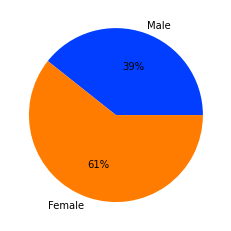

In [14]:
# Check the categorical columns distribution

palette_color = sns.color_palette('bright') # Define color palette

# sex column composition
data = ['Male','Female']
freq = [df.sex[df['sex'] == 1].value_counts().sum() , df.sex[df['sex'] == 2].value_counts().sum()]
plt.pie(freq, labels=data, colors=palette_color, autopct='%.0f%%')
plt.show()

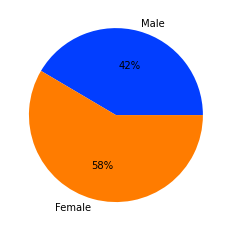

In [15]:
# sex column related to default payment check
df_1 = df[df['default_payment_next_month'] == 1]
data = ['Male','Female']
freq = [df_1.sex[df_1['sex'] == 1].value_counts().sum() , df_1.sex[df_1['sex'] == 2].value_counts().sum()]
plt.pie(freq, labels=data, colors=palette_color, autopct='%.0f%%')
plt.show()

Statement :
<br>
Female is dominating the whole population of data where 61% of the total data are them.
<br>
Besides that, Female is also dominating the number of default payment with 58% of the total data are them.

1 : 39.47 % male & 60.53 % female 
2 : 38.95 % male & 61.05 % female 
3 : 38.68 % male & 61.32 % female 
4 : 50.0 % male & 50.0 % female 
5 : 62.5 % male & 37.5 % female 


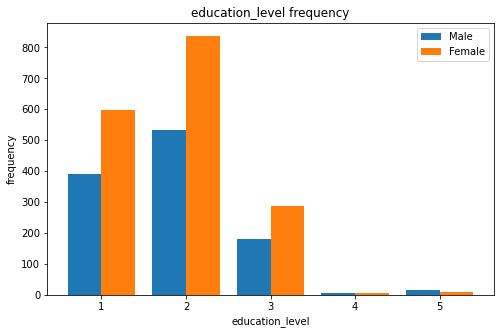

In [16]:
# education_level column related to default payment
data = np.arange(1, 6)
data_axis = np.arange(len(data))

df_m = df[df['sex'] == 1] # Male
freq_1m = df_m.education_level[df_m['education_level'] == 1].value_counts().sum()
freq_2m = df_m.education_level[df_m['education_level'] == 2].value_counts().sum()
freq_3m = df_m.education_level[df_m['education_level'] == 3].value_counts().sum()
freq_4m = df_m.education_level[df_m['education_level'] == 4].value_counts().sum()
freq_5m = df_m.education_level[df_m['education_level'] == 5].value_counts().sum()
freqm = [freq_1m, freq_2m, freq_3m, freq_4m, freq_5m]

df_f = df[df['sex'] == 2] # Female
freq_1f = df_f.education_level[df_f['education_level'] == 1].value_counts().sum()
freq_2f = df_f.education_level[df_f['education_level'] == 2].value_counts().sum()
freq_3f = df_f.education_level[df_f['education_level'] == 3].value_counts().sum()
freq_4f = df_f.education_level[df_f['education_level'] == 4].value_counts().sum()
freq_5f = df_f.education_level[df_f['education_level'] == 5].value_counts().sum()
freqf = [freq_1f, freq_2f, freq_3f, freq_4f, freq_5f]

print('1 :', round(freq_1m * 100 / (freq_1m + freq_1f),2), '% male &', round(freq_1f * 100 / (freq_1m + freq_1f),2), '% female ')
print('2 :', round(freq_2m * 100 / (freq_2m + freq_2f),2), '% male &', round(freq_2f * 100 / (freq_2m + freq_2f),2), '% female ')
print('3 :', round(freq_3m * 100 / (freq_3m + freq_3f),2), '% male &', round(freq_3f * 100 / (freq_3m + freq_3f),2), '% female ')
print('4 :', round(freq_4m * 100 / (freq_4m + freq_4f),2), '% male &', round(freq_4f * 100 / (freq_4m + freq_4f),2), '% female ')
print('5 :', round(freq_5m * 100 / (freq_5m + freq_5f),2), '% male &', round(freq_5f * 100 / (freq_5m + freq_5f),2), '% female ')

fig = plt.figure(figsize = (8, 5))

plt.bar(data_axis - 0.2, freqm, 0.4, label = 'Male')
plt.bar(data_axis + 0.2, freqf, 0.4, label = 'Female')
plt.xticks(data_axis, data)

plt.xlabel('education_level')
plt.ylabel('frequency')
plt.title('education_level frequency')
plt.legend()
plt.show()

Statement :
<br>
Almost same as the sex ratio male & female percentage of the entire dataset, education_level column shows the same thing. Even though in class 4 and 5 show an opposite ratio, since the class 4 and 5 is only a very small amount of data compared to other classes, therefore we can focus only on class 1, 2, and 3.

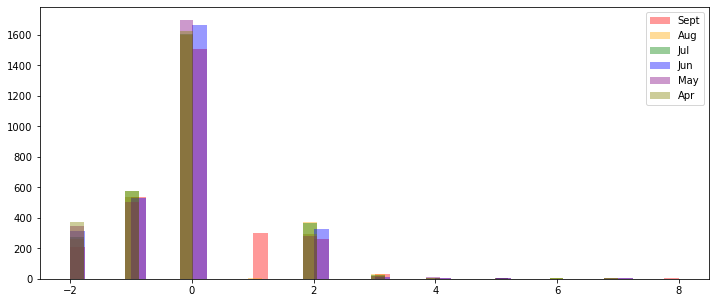

In [17]:
# Compare distribution of pay_...
fig = plt.figure(figsize = (12, 5))
plt.hist(df['pay_0'], bins = 40, alpha = 0.40, color = 'red')
plt.hist(df['pay_2'], bins = 40, alpha = 0.40, color = 'orange')
plt.hist(df['pay_3'], bins = 40, alpha = 0.40, color = 'green')
plt.hist(df['pay_4'], bins = 40, alpha = 0.40, color = 'blue')
plt.hist(df['pay_5'], bins = 40, alpha = 0.40, color = 'purple')
plt.hist(df['pay_6'], bins = 40, alpha = 0.40, color = 'olive')
plt.legend(['Sept','Aug','Jul','Jun','May','Apr'])
plt.show()

Statement :
<br>
pay_... distribution is quite similar for every month yet there are no significant differences, there is a possibility where month doesn't affect the repayment status.

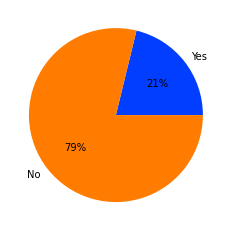

In [18]:
# Check the target balance
data = ['Yes','No']
freq = [df.default_payment_next_month[df['default_payment_next_month'] == 1].value_counts().sum() , df.default_payment_next_month[df['default_payment_next_month'] == 0].value_counts().sum()]
plt.pie(freq, labels=data, colors=palette_color, autopct='%.0f%%')
plt.show()

Statement :
<br>
There's imbalance composition in target data, where the target is dominated by the value 0 (No) for 79% from the whole dataset.
<br>
Therefore, the calculation of forecast accuracy will use the f1 score.

#### 4. Data Preprocessing

In [19]:
# Split train test set with Inference Model
data_inf = df.sample(10, random_state = 1)

# Remove Inference Model from dataset
data_train_test = df.drop(data_inf.index)

# Reset index for both dataset
data_train_test.reset_index(drop = True , inplace = True)
data_inf.reset_index(drop = True , inplace = True)

In [20]:
# Split data features and target
X = data_train_test.drop('default_payment_next_month', axis = 1)
y = pd.DataFrame(data_train_test['default_payment_next_month'])

# Split data train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1) # 20% data will be used as test set

In [21]:
# Check all numerical data outliers

# Define a function for Skewed distribution outliers lower and upper limit
def Skew_LLUL(df, variable, multiplier = 1.5):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    LL = Q1 - multiplier * IQR
    UL = Q3 + multiplier * IQR
    return LL, UL

# Show outliers dataframe
def Show_LLUL(df, variable, LL, UL):
    out_only = df[(df[variable] > UL) | (df[variable] < LL)]
    print(len(out_only) / len(df) * 100, '% of overall data is considered as outliers')
    return out_only

In [22]:
# Calculate lower and upper limits for every numerical columns
limit_balance_LL, limit_balance_UL = Skew_LLUL(X_train, 'limit_balance')
age_LL, age_UL = Skew_LLUL(X_train, 'age')
bill_amt_1_LL, bill_amt_1_UL = Skew_LLUL(X_train, 'bill_amt_1')
bill_amt_2_LL, bill_amt_2_UL = Skew_LLUL(X_train, 'bill_amt_2')
bill_amt_3_LL, bill_amt_3_UL = Skew_LLUL(X_train, 'bill_amt_3')
bill_amt_4_LL, bill_amt_4_UL = Skew_LLUL(X_train, 'bill_amt_4')
bill_amt_5_LL, bill_amt_5_UL = Skew_LLUL(X_train, 'bill_amt_5')
bill_amt_6_LL, bill_amt_6_UL = Skew_LLUL(X_train, 'bill_amt_6')
pay_amt_1_LL, pay_amt_1_UL = Skew_LLUL(X_train, 'pay_amt_1',3)
pay_amt_2_LL, pay_amt_2_UL = Skew_LLUL(X_train, 'pay_amt_2',3)
pay_amt_3_LL, pay_amt_3_UL = Skew_LLUL(X_train, 'pay_amt_3',3)
pay_amt_4_LL, pay_amt_4_UL = Skew_LLUL(X_train, 'pay_amt_4',3)
pay_amt_5_LL, pay_amt_5_UL = Skew_LLUL(X_train, 'pay_amt_5',3)
pay_amt_6_LL, pay_amt_6_UL = Skew_LLUL(X_train, 'pay_amt_6',3)

In [23]:
# Shows limit_balance outliers
limit_balance_LL_UL = Show_LLUL(X_train, 'limit_balance', limit_balance_LL, limit_balance_UL)
limit_balance_LL_UL

0.43821209465381245 % of overall data is considered as outliers


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
257,700000.0,2,1,1,36.0,0,0,0,0,0,...,328316.0,325968.0,271596.0,286805.0,13000.0,11939.0,10312.0,20004.0,20000.0,20000.0
1264,530000.0,1,1,2,32.0,-2,-2,-1,0,0,...,15688.0,24511.0,12144.0,34963.0,24120.0,15791.0,12808.0,8090.0,34110.0,90231.0
329,750000.0,2,1,1,41.0,0,0,0,0,-1,...,92767.0,75696.0,35485.0,4889.0,6817.0,2330.0,2705.0,50854.0,4913.0,550.0
34,780000.0,1,1,1,48.0,0,0,0,0,0,...,190663.0,195124.0,184872.0,191090.0,10000.0,15004.0,10000.0,8000.0,10028.0,7003.0
62,510000.0,2,3,1,61.0,0,0,2,0,0,...,181801.0,178179.0,223100.0,216225.0,17000.0,0.0,6508.0,50000.0,7000.0,6000.0
1479,620000.0,2,1,2,38.0,-1,-1,-1,-1,-1,...,620.0,16022.0,2581.0,2867.0,8638.0,620.0,16032.0,2856.0,4197.0,920.0
780,530000.0,2,1,2,39.0,0,0,0,0,0,...,364298.0,345867.0,346676.0,352736.0,17045.0,14089.0,11962.0,11763.0,12557.0,12496.0
2413,680000.0,2,1,1,42.0,0,0,0,0,0,...,190076.0,181957.0,182226.0,177731.0,8000.0,9000.0,7000.0,7000.0,7000.0,7000.0
539,800000.0,1,2,1,53.0,-1,-1,-1,0,0,...,64535.0,40814.0,12590.0,9339.0,11145.0,64657.0,131.0,247.0,9366.0,63482.0
2464,510000.0,2,2,1,38.0,0,0,0,0,0,...,37361.0,39437.0,40292.0,41153.0,2000.0,2700.0,2700.0,1500.0,1500.0,10000.0


Statement :
<br>
Since there is no source for credit limit in taiwan, therefore I will consider all of the outlier data as real outlier.
<br>
But the number of outlier is less than 5%, which means trimming method will be performed because the small number of composition won't affect the whole dataset.

In [24]:
# Shows age outliers
Show_LLUL(X_train, 'age', age_LL, age_UL)

0.9640666082383873 % of overall data is considered as outliers


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
208,50000.0,1,3,1,65.0,0,0,0,0,0,...,47942.0,48418.0,49530.0,28085.0,2068.0,1545.0,1171.0,1658.0,1321.0,0.0
1561,160000.0,1,3,1,62.0,0,0,0,0,0,...,40460.0,41149.0,-1.0,-1.0,1700.0,2400.0,2000.0,0.0,0.0,0.0
2791,180000.0,1,1,1,63.0,0,0,0,0,0,...,130572.0,120464.0,109129.0,112273.0,7000.0,5500.0,4218.0,4500.0,5000.0,4000.0
1994,70000.0,1,2,2,62.0,6,5,4,3,2,...,95609.0,86494.0,79359.0,74937.0,0.0,0.0,0.0,0.0,2150.0,2511.0
764,80000.0,2,3,2,65.0,2,0,0,0,0,...,84247.0,81619.0,30095.0,20639.0,3900.0,4000.0,2048.0,1300.0,1700.0,401.0
1577,440000.0,1,1,1,62.0,0,0,0,-1,2,...,649.0,1108.0,150.0,1075.0,4909.0,499.0,959.0,0.0,925.0,1392.0
1584,50000.0,2,3,1,61.0,2,0,0,0,2,...,6985.0,6354.0,4908.0,3724.0,1135.0,1055.0,656.0,0.0,133.0,50.0
979,10000.0,1,3,2,61.0,0,0,0,0,0,...,9273.0,9774.0,9973.0,9638.0,1293.0,1235.0,1000.0,199.0,193.0,197.0
76,290000.0,1,3,1,61.0,0,0,0,0,0,...,296084.0,218399.0,200461.0,204637.0,10492.0,12447.0,8973.0,6761.0,6983.0,5980.0
2235,200000.0,2,2,1,69.0,0,0,0,0,0,...,47952.0,49052.0,49936.0,50977.0,2100.0,2100.0,2200.0,2000.0,2000.0,2011.0


Statement :
<br>
Taiwan's life expectancy in 2005 is 77.44 years. Since there is no outlier with number over than 77.44 years, all of outlier will be considered as natural outliers and won't be manipulated by any chances.
<br>
Source : https://www.macrotrends.net/countries/TWN/taiwan/life-expectancy

In [25]:
# Shows bill_amt_1 outliers
Show_LLUL(X_train, 'bill_amt_1', bill_amt_1_LL, bill_amt_1_UL)

7.05521472392638 % of overall data is considered as outliers


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1611,240000.0,2,2,1,46.0,0,0,0,0,-2,...,166064.0,0.0,0.0,0.0,7053.0,6520.0,0.0,0.0,0.0,0.0
836,210000.0,2,2,2,44.0,0,0,0,0,0,...,320167.0,327871.0,34285.0,30900.0,9408.0,10300.0,11642.0,1602.0,1500.0,0.0
840,200000.0,2,3,2,49.0,0,0,2,0,0,...,203592.0,194238.0,192451.0,196355.0,17500.0,0.0,7000.0,7350.0,7300.0,11500.0
257,700000.0,2,1,1,36.0,0,0,0,0,0,...,328316.0,325968.0,271596.0,286805.0,13000.0,11939.0,10312.0,20004.0,20000.0,20000.0
216,380000.0,1,3,1,52.0,2,0,0,0,0,...,375150.0,383319.0,385813.0,365587.0,15353.0,14219.0,15022.0,29000.0,0.0,27000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,140000.0,1,2,2,33.0,0,0,0,0,0,...,25020.0,21629.0,18367.0,15161.0,7000.0,2000.0,2000.0,2000.0,2000.0,2000.0
1067,430000.0,1,1,2,34.0,0,0,0,0,0,...,434836.0,378571.0,228568.0,232668.0,16005.0,18016.0,16005.0,9005.0,9013.0,8010.0
319,500000.0,2,1,1,41.0,0,0,0,0,0,...,197284.0,199489.0,201484.0,204017.0,8501.0,8001.0,6701.0,6321.0,6401.0,6379.0
2628,380000.0,1,2,2,34.0,0,0,0,0,0,...,193992.0,174675.0,171253.0,169121.0,9010.0,35000.0,5000.0,6000.0,5000.0,4400.0


In [26]:
# Shows bill_amt_2 outliers
Show_LLUL(X_train, 'bill_amt_2', bill_amt_2_LL, bill_amt_2_UL)

7.581069237510955 % of overall data is considered as outliers


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1611,240000.0,2,2,1,46.0,0,0,0,0,-2,...,166064.0,0.0,0.0,0.0,7053.0,6520.0,0.0,0.0,0.0,0.0
836,210000.0,2,2,2,44.0,0,0,0,0,0,...,320167.0,327871.0,34285.0,30900.0,9408.0,10300.0,11642.0,1602.0,1500.0,0.0
840,200000.0,2,3,2,49.0,0,0,2,0,0,...,203592.0,194238.0,192451.0,196355.0,17500.0,0.0,7000.0,7350.0,7300.0,11500.0
257,700000.0,2,1,1,36.0,0,0,0,0,0,...,328316.0,325968.0,271596.0,286805.0,13000.0,11939.0,10312.0,20004.0,20000.0,20000.0
216,380000.0,1,3,1,52.0,2,0,0,0,0,...,375150.0,383319.0,385813.0,365587.0,15353.0,14219.0,15022.0,29000.0,0.0,27000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,390000.0,2,1,1,40.0,1,-1,0,0,0,...,211996.0,210100.0,206462.0,203201.0,236533.0,38142.0,15152.0,38097.0,23080.0,15055.0
1067,430000.0,1,1,2,34.0,0,0,0,0,0,...,434836.0,378571.0,228568.0,232668.0,16005.0,18016.0,16005.0,9005.0,9013.0,8010.0
319,500000.0,2,1,1,41.0,0,0,0,0,0,...,197284.0,199489.0,201484.0,204017.0,8501.0,8001.0,6701.0,6321.0,6401.0,6379.0
2628,380000.0,1,2,2,34.0,0,0,0,0,0,...,193992.0,174675.0,171253.0,169121.0,9010.0,35000.0,5000.0,6000.0,5000.0,4400.0


In [27]:
# Shows bill_amt_3 outliers
Show_LLUL(X_train, 'bill_amt_3', bill_amt_3_LL, bill_amt_3_UL)

7.186678352322525 % of overall data is considered as outliers


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1611,240000.0,2,2,1,46.0,0,0,0,0,-2,...,166064.0,0.0,0.0,0.0,7053.0,6520.0,0.0,0.0,0.0,0.0
836,210000.0,2,2,2,44.0,0,0,0,0,0,...,320167.0,327871.0,34285.0,30900.0,9408.0,10300.0,11642.0,1602.0,1500.0,0.0
840,200000.0,2,3,2,49.0,0,0,2,0,0,...,203592.0,194238.0,192451.0,196355.0,17500.0,0.0,7000.0,7350.0,7300.0,11500.0
257,700000.0,2,1,1,36.0,0,0,0,0,0,...,328316.0,325968.0,271596.0,286805.0,13000.0,11939.0,10312.0,20004.0,20000.0,20000.0
216,380000.0,1,3,1,52.0,2,0,0,0,0,...,375150.0,383319.0,385813.0,365587.0,15353.0,14219.0,15022.0,29000.0,0.0,27000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,430000.0,1,1,2,34.0,0,0,0,0,0,...,434836.0,378571.0,228568.0,232668.0,16005.0,18016.0,16005.0,9005.0,9013.0,8010.0
1869,160000.0,1,5,2,46.0,0,0,0,0,-2,...,162998.0,0.0,0.0,0.0,4318.0,4000.0,0.0,0.0,0.0,73175.0
319,500000.0,2,1,1,41.0,0,0,0,0,0,...,197284.0,199489.0,201484.0,204017.0,8501.0,8001.0,6701.0,6321.0,6401.0,6379.0
2628,380000.0,1,2,2,34.0,0,0,0,0,0,...,193992.0,174675.0,171253.0,169121.0,9010.0,35000.0,5000.0,6000.0,5000.0,4400.0


In [28]:
# Shows bill_amt_4 outliers
Show_LLUL(X_train, 'bill_amt_4', bill_amt_4_LL, bill_amt_4_UL)

6.704645048203331 % of overall data is considered as outliers


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
836,210000.0,2,2,2,44.0,0,0,0,0,0,...,320167.0,327871.0,34285.0,30900.0,9408.0,10300.0,11642.0,1602.0,1500.0,0.0
840,200000.0,2,3,2,49.0,0,0,2,0,0,...,203592.0,194238.0,192451.0,196355.0,17500.0,0.0,7000.0,7350.0,7300.0,11500.0
257,700000.0,2,1,1,36.0,0,0,0,0,0,...,328316.0,325968.0,271596.0,286805.0,13000.0,11939.0,10312.0,20004.0,20000.0,20000.0
216,380000.0,1,3,1,52.0,2,0,0,0,0,...,375150.0,383319.0,385813.0,365587.0,15353.0,14219.0,15022.0,29000.0,0.0,27000.0
194,200000.0,2,2,1,37.0,0,0,0,0,0,...,190569.0,191730.0,171269.0,151550.0,8017.0,8000.0,8000.0,9000.0,7000.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,390000.0,2,1,1,40.0,1,-1,0,0,0,...,211996.0,210100.0,206462.0,203201.0,236533.0,38142.0,15152.0,38097.0,23080.0,15055.0
1067,430000.0,1,1,2,34.0,0,0,0,0,0,...,434836.0,378571.0,228568.0,232668.0,16005.0,18016.0,16005.0,9005.0,9013.0,8010.0
319,500000.0,2,1,1,41.0,0,0,0,0,0,...,197284.0,199489.0,201484.0,204017.0,8501.0,8001.0,6701.0,6321.0,6401.0,6379.0
2628,380000.0,1,2,2,34.0,0,0,0,0,0,...,193992.0,174675.0,171253.0,169121.0,9010.0,35000.0,5000.0,6000.0,5000.0,4400.0


In [29]:
# Shows bill_amt_5 outliers
Show_LLUL(X_train, 'bill_amt_5', bill_amt_5_LL, bill_amt_5_UL)

6.879929886064855 % of overall data is considered as outliers


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2708,180000.0,1,1,2,32.0,0,0,0,0,0,...,146396.0,136531.0,138502.0,136665.0,7500.0,7000.0,5000.0,5000.0,6000.0,5137.0
840,200000.0,2,3,2,49.0,0,0,2,0,0,...,203592.0,194238.0,192451.0,196355.0,17500.0,0.0,7000.0,7350.0,7300.0,11500.0
257,700000.0,2,1,1,36.0,0,0,0,0,0,...,328316.0,325968.0,271596.0,286805.0,13000.0,11939.0,10312.0,20004.0,20000.0,20000.0
216,380000.0,1,3,1,52.0,2,0,0,0,0,...,375150.0,383319.0,385813.0,365587.0,15353.0,14219.0,15022.0,29000.0,0.0,27000.0
194,200000.0,2,2,1,37.0,0,0,0,0,0,...,190569.0,191730.0,171269.0,151550.0,8017.0,8000.0,8000.0,9000.0,7000.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,390000.0,2,1,1,40.0,1,-1,0,0,0,...,211996.0,210100.0,206462.0,203201.0,236533.0,38142.0,15152.0,38097.0,23080.0,15055.0
1067,430000.0,1,1,2,34.0,0,0,0,0,0,...,434836.0,378571.0,228568.0,232668.0,16005.0,18016.0,16005.0,9005.0,9013.0,8010.0
319,500000.0,2,1,1,41.0,0,0,0,0,0,...,197284.0,199489.0,201484.0,204017.0,8501.0,8001.0,6701.0,6321.0,6401.0,6379.0
2628,380000.0,1,2,2,34.0,0,0,0,0,0,...,193992.0,174675.0,171253.0,169121.0,9010.0,35000.0,5000.0,6000.0,5000.0,4400.0


In [30]:
# Shows bill_amt_6 outliers
Show_LLUL(X_train, 'bill_amt_6', bill_amt_6_LL, bill_amt_6_UL)

7.099035933391762 % of overall data is considered as outliers


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2708,180000.0,1,1,2,32.0,0,0,0,0,0,...,146396.0,136531.0,138502.0,136665.0,7500.0,7000.0,5000.0,5000.0,6000.0,5137.0
840,200000.0,2,3,2,49.0,0,0,2,0,0,...,203592.0,194238.0,192451.0,196355.0,17500.0,0.0,7000.0,7350.0,7300.0,11500.0
257,700000.0,2,1,1,36.0,0,0,0,0,0,...,328316.0,325968.0,271596.0,286805.0,13000.0,11939.0,10312.0,20004.0,20000.0,20000.0
216,380000.0,1,3,1,52.0,2,0,0,0,0,...,375150.0,383319.0,385813.0,365587.0,15353.0,14219.0,15022.0,29000.0,0.0,27000.0
194,200000.0,2,2,1,37.0,0,0,0,0,0,...,190569.0,191730.0,171269.0,151550.0,8017.0,8000.0,8000.0,9000.0,7000.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,430000.0,1,1,2,34.0,0,0,0,0,0,...,434836.0,378571.0,228568.0,232668.0,16005.0,18016.0,16005.0,9005.0,9013.0,8010.0
15,150000.0,2,1,1,45.0,0,0,0,0,0,...,128709.0,131292.0,134011.0,136711.0,3575.0,3647.0,3678.0,3793.0,3835.0,3952.0
319,500000.0,2,1,1,41.0,0,0,0,0,0,...,197284.0,199489.0,201484.0,204017.0,8501.0,8001.0,6701.0,6321.0,6401.0,6379.0
2628,380000.0,1,2,2,34.0,0,0,0,0,0,...,193992.0,174675.0,171253.0,169121.0,9010.0,35000.0,5000.0,6000.0,5000.0,4400.0


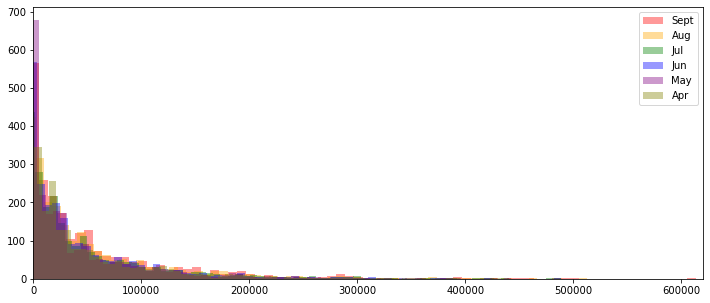

In [31]:
# Compare distribution of bill_amt_...
fig = plt.figure(figsize = (12, 5))
plt.hist(X_train['bill_amt_1'], bins = 75, alpha = 0.40, color = 'red')
plt.hist(X_train['bill_amt_2'], bins = 75, alpha = 0.40, color = 'orange')
plt.hist(X_train['bill_amt_3'], bins = 75, alpha = 0.40, color = 'green')
plt.hist(X_train['bill_amt_4'], bins = 75, alpha = 0.40, color = 'blue')
plt.hist(X_train['bill_amt_5'], bins = 75, alpha = 0.40, color = 'purple')
plt.hist(X_train['bill_amt_6'], bins = 75, alpha = 0.40, color = 'olive')
plt.legend(['Sept','Aug','Jul','Jun','May','Apr'])
plt.xlim([0,620000])
plt.show()

Statement :
<br>
Due to the bill_amt_... distribution is nearly identical, and their outliers percentage correspond to overall data is also nearly same. Therefore, the outliers will be considered as natural outliers. Besides that, with that amount of column that has the same outliers, data manipulation will be very affecting the data pattern.

In [32]:
# Shows pay_amt_1 outliers
Show_LLUL(X_train, 'pay_amt_1', pay_amt_1_LL, pay_amt_1_UL)

5.4776511831726555 % of overall data is considered as outliers


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2698,170000.0,1,2,2,31.0,0,0,0,0,0,...,160847.0,87399.0,74761.0,67855.0,46000.0,10002.0,3046.0,5000.0,0.0,10000.0
533,300000.0,2,2,1,45.0,-1,-1,-1,-1,0,...,18911.0,15982.0,2665.0,57096.0,71277.0,19003.0,16050.0,2659.0,54394.0,52000.0
1264,530000.0,1,1,2,32.0,-2,-2,-1,0,0,...,15688.0,24511.0,12144.0,34963.0,24120.0,15791.0,12808.0,8090.0,34110.0,90231.0
1833,120000.0,1,1,2,32.0,0,0,0,0,2,...,122177.0,120667.0,47880.0,49629.0,20137.0,50053.0,29377.0,0.0,30000.0,984.0
1011,50000.0,1,2,2,40.0,0,0,0,0,0,...,48890.0,8694.0,8876.0,9052.0,18280.0,2284.0,311.0,322.0,323.0,334.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,310000.0,2,2,1,42.0,0,-1,-1,2,-1,...,17257.0,7900.0,17161.0,14585.0,19697.0,2270.0,4.0,17161.0,7030.0,0.0
532,390000.0,2,1,1,40.0,1,-1,0,0,0,...,211996.0,210100.0,206462.0,203201.0,236533.0,38142.0,15152.0,38097.0,23080.0,15055.0
648,200000.0,2,2,1,39.0,1,-1,0,0,-1,...,62433.0,-82.0,16550.0,5239.0,21801.0,42745.0,0.0,16632.0,5265.0,0.0
1844,80000.0,1,3,2,27.0,0,0,2,2,2,...,62163.0,62756.0,61149.0,62464.0,50000.0,4000.0,2200.0,0.0,2300.0,5108.0


In [33]:
# Shows pay_amt_2 outliers
Show_LLUL(X_train, 'pay_amt_2', pay_amt_2_LL, pay_amt_2_UL)

6.00350569675723 % of overall data is considered as outliers


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
241,140000.0,2,3,1,39.0,0,0,0,0,0,...,76412.0,70091.0,63279.0,56854.0,3112.0,20000.0,3043.0,2359.0,2187.0,1706.0
569,320000.0,2,2,1,44.0,-1,-1,-1,-1,-1,...,46163.0,1373.0,6064.0,2145.0,12498.0,46185.0,1387.0,6094.0,2155.0,1273.0
1432,200000.0,2,1,2,41.0,-1,-1,-1,-1,-1,...,21699.0,2914.0,3392.0,4343.0,2502.0,21699.0,3003.0,3392.0,4343.0,326.0
2804,50000.0,2,3,1,36.0,0,-1,0,0,0,...,25967.0,17227.0,15714.0,15876.0,1710.0,25000.0,754.0,600.0,800.0,1900.0
2584,50000.0,2,1,2,29.0,0,0,0,0,0,...,40125.0,37552.0,22960.0,14735.0,6540.0,37130.0,2858.0,3000.0,1000.0,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,200000.0,2,2,1,39.0,1,-1,0,0,-1,...,62433.0,-82.0,16550.0,5239.0,21801.0,42745.0,0.0,16632.0,5265.0,0.0
1046,20000.0,1,2,2,32.0,0,0,-1,0,0,...,17199.0,18367.0,18130.0,18500.0,2000.0,17199.0,1600.0,363.0,370.0,1500.0
25,500000.0,2,1,1,34.0,0,0,0,0,0,...,60927.0,76088.0,110294.0,108964.0,15000.0,30007.0,30000.0,50000.0,5000.0,5000.0
1411,460000.0,2,1,2,34.0,-1,-1,-1,-1,-1,...,21494.0,12657.0,5739.0,10184.0,8869.0,23664.0,12659.0,5752.0,10192.0,7419.0


In [34]:
# Shows pay_amt_3 outliers
Show_LLUL(X_train, 'pay_amt_3', pay_amt_3_LL, pay_amt_3_UL)

5.214723926380368 % of overall data is considered as outliers


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1406,260000.0,1,1,2,28.0,-1,-1,-1,-1,-1,...,13392.0,22209.0,54807.0,62534.0,11515.0,13419.0,22209.0,54807.0,62534.0,37935.0
492,450000.0,1,1,1,44.0,-2,-2,-2,-2,-2,...,4700.0,20916.0,9695.0,6361.0,3423.0,4700.0,20916.0,9695.0,6361.0,6447.0
2735,160000.0,1,1,2,28.0,0,0,0,0,0,...,154012.0,151403.0,115731.0,113635.0,6000.0,25409.0,30000.0,5000.0,5000.0,4500.0
1471,350000.0,1,3,2,36.0,-1,-1,-1,-1,-1,...,12622.0,18103.0,13547.0,38868.0,6088.0,12635.0,18119.0,13547.0,38868.0,4650.0
1833,120000.0,1,1,2,32.0,0,0,0,0,2,...,122177.0,120667.0,47880.0,49629.0,20137.0,50053.0,29377.0,0.0,30000.0,984.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,210000.0,2,1,2,37.0,-1,-1,-1,-1,0,...,17036.0,73158.0,46823.0,1427.0,1570.0,17036.0,73158.0,936.0,29.0,630.0
243,50000.0,2,2,1,42.0,0,0,0,0,0,...,28868.0,44751.0,27557.0,29125.0,2083.0,1840.0,31000.0,977.0,2003.0,1214.0
25,500000.0,2,1,1,34.0,0,0,0,0,0,...,60927.0,76088.0,110294.0,108964.0,15000.0,30007.0,30000.0,50000.0,5000.0,5000.0
1321,430000.0,1,3,2,38.0,-2,-2,-2,-2,-2,...,5930.0,33736.0,23558.0,8118.0,3507.0,5960.0,39507.0,11838.0,8158.0,8509.0


In [35]:
# Shows pay_amt_4 outliers
Show_LLUL(X_train, 'pay_amt_4', pay_amt_4_LL, pay_amt_4_UL)

4.732690622261174 % of overall data is considered as outliers


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1406,260000.0,1,1,2,28.0,-1,-1,-1,-1,-1,...,13392.0,22209.0,54807.0,62534.0,11515.0,13419.0,22209.0,54807.0,62534.0,37935.0
257,700000.0,2,1,1,36.0,0,0,0,0,0,...,328316.0,325968.0,271596.0,286805.0,13000.0,11939.0,10312.0,20004.0,20000.0,20000.0
216,380000.0,1,3,1,52.0,2,0,0,0,0,...,375150.0,383319.0,385813.0,365587.0,15353.0,14219.0,15022.0,29000.0,0.0,27000.0
329,750000.0,2,1,1,41.0,0,0,0,0,-1,...,92767.0,75696.0,35485.0,4889.0,6817.0,2330.0,2705.0,50854.0,4913.0,550.0
1413,210000.0,1,2,2,33.0,-1,-1,-1,-1,-1,...,264.0,264.0,42515.0,43104.0,264.0,264.0,264.0,42515.0,1559.0,1472.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,300000.0,2,2,2,36.0,1,-2,-1,-1,-1,...,200.0,0.0,16418.0,88632.0,0.0,200.0,0.0,16418.0,88632.0,1913.0
648,200000.0,2,2,1,39.0,1,-1,0,0,-1,...,62433.0,-82.0,16550.0,5239.0,21801.0,42745.0,0.0,16632.0,5265.0,0.0
1150,140000.0,2,2,2,32.0,-1,0,0,0,-1,...,11755.0,7453.0,38415.0,31685.0,1231.0,1262.0,1000.0,38415.0,4000.0,4000.0
25,500000.0,2,1,1,34.0,0,0,0,0,0,...,60927.0,76088.0,110294.0,108964.0,15000.0,30007.0,30000.0,50000.0,5000.0,5000.0


In [36]:
# Shows pay_amt_5 outliers
Show_LLUL(X_train, 'pay_amt_5', pay_amt_5_LL, pay_amt_5_UL)

5.127081507449606 % of overall data is considered as outliers


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1406,260000.0,1,1,2,28.0,-1,-1,-1,-1,-1,...,13392.0,22209.0,54807.0,62534.0,11515.0,13419.0,22209.0,54807.0,62534.0,37935.0
2773,260000.0,2,2,2,26.0,0,0,0,0,0,...,22248.0,26842.0,35997.0,55272.0,2000.0,5000.0,5000.0,10000.0,20000.0,15000.0
1307,130000.0,2,2,2,25.0,-2,-2,-2,-2,-2,...,1298.0,550.0,-286.0,55138.0,1200.0,1300.0,964.0,1698.0,60549.0,5000.0
257,700000.0,2,1,1,36.0,0,0,0,0,0,...,328316.0,325968.0,271596.0,286805.0,13000.0,11939.0,10312.0,20004.0,20000.0,20000.0
679,180000.0,2,2,1,40.0,0,-1,-1,-1,-1,...,334.0,9379.0,1100.0,43505.0,1620.0,337.0,9379.0,1100.0,43505.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,390000.0,2,1,1,40.0,1,-1,0,0,0,...,211996.0,210100.0,206462.0,203201.0,236533.0,38142.0,15152.0,38097.0,23080.0,15055.0
2311,230000.0,2,2,2,27.0,0,0,0,0,0,...,32029.0,31397.0,27834.0,28153.0,2000.0,2500.0,1200.0,2000.0,18000.0,5000.0
1277,300000.0,2,2,2,36.0,1,-2,-1,-1,-1,...,200.0,0.0,16418.0,88632.0,0.0,200.0,0.0,16418.0,88632.0,1913.0
1801,80000.0,2,2,2,24.0,0,0,0,0,0,...,20407.0,18839.0,3810.0,23836.0,2007.0,2000.0,1014.0,0.0,23836.0,3000.0


In [37]:
# Shows pay_amt_6 outliers
Show_LLUL(X_train, 'pay_amt_3', pay_amt_6_LL, pay_amt_6_UL)

5.346187554776511 % of overall data is considered as outliers


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1406,260000.0,1,1,2,28.0,-1,-1,-1,-1,-1,...,13392.0,22209.0,54807.0,62534.0,11515.0,13419.0,22209.0,54807.0,62534.0,37935.0
492,450000.0,1,1,1,44.0,-2,-2,-2,-2,-2,...,4700.0,20916.0,9695.0,6361.0,3423.0,4700.0,20916.0,9695.0,6361.0,6447.0
2735,160000.0,1,1,2,28.0,0,0,0,0,0,...,154012.0,151403.0,115731.0,113635.0,6000.0,25409.0,30000.0,5000.0,5000.0,4500.0
1471,350000.0,1,3,2,36.0,-1,-1,-1,-1,-1,...,12622.0,18103.0,13547.0,38868.0,6088.0,12635.0,18119.0,13547.0,38868.0,4650.0
1833,120000.0,1,1,2,32.0,0,0,0,0,2,...,122177.0,120667.0,47880.0,49629.0,20137.0,50053.0,29377.0,0.0,30000.0,984.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,210000.0,2,1,2,37.0,-1,-1,-1,-1,0,...,17036.0,73158.0,46823.0,1427.0,1570.0,17036.0,73158.0,936.0,29.0,630.0
243,50000.0,2,2,1,42.0,0,0,0,0,0,...,28868.0,44751.0,27557.0,29125.0,2083.0,1840.0,31000.0,977.0,2003.0,1214.0
25,500000.0,2,1,1,34.0,0,0,0,0,0,...,60927.0,76088.0,110294.0,108964.0,15000.0,30007.0,30000.0,50000.0,5000.0,5000.0
1321,430000.0,1,3,2,38.0,-2,-2,-2,-2,-2,...,5930.0,33736.0,23558.0,8118.0,3507.0,5960.0,39507.0,11838.0,8158.0,8509.0


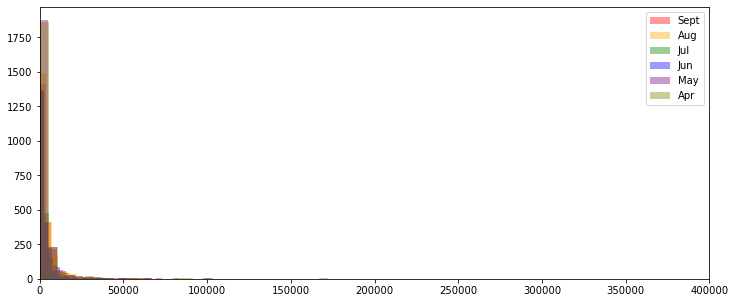

In [38]:
# Compare distribution of pay_amt_...
fig = plt.figure(figsize = (12, 5))
plt.hist(X_train['pay_amt_1'], bins = 75, alpha = 0.40, color = 'red')
plt.hist(X_train['pay_amt_2'], bins = 75, alpha = 0.40, color = 'orange')
plt.hist(X_train['pay_amt_3'], bins = 75, alpha = 0.40, color = 'green')
plt.hist(X_train['pay_amt_4'], bins = 75, alpha = 0.40, color = 'blue')
plt.hist(X_train['pay_amt_5'], bins = 75, alpha = 0.40, color = 'purple')
plt.hist(X_train['pay_amt_6'], bins = 75, alpha = 0.40, color = 'olive')
plt.legend(['Sept','Aug','Jul','Jun','May','Apr'])
plt.xlim([0,400000])
plt.show()

Statement :
<br>
The pay_amt_... data outliers is nearly 6% of the overall data. Since there's is no source for pay amount of credit, therefore Capping method will be done within in mind that trimming method is unable to perform during the number of data that loss after trimming.

In [39]:
# Split the pay_amt_...
pay_amt_list = ['pay_amt_1' , 'pay_amt_2' , 'pay_amt_3' , 'pay_amt_4' , 'pay_amt_5' , 'pay_amt_6']
df_pay = X_train[pay_amt_list]

# Making function for winsorizer
winsoriser = Winsorizer(capping_method='iqr', tail = 'right', fold = 3)

# Model learning the data distribution
winsoriser.fit(df_pay)

# Make a new dataframe with pay_amt_... data that has been capped
df_pay_capped = winsoriser.transform(df_pay)

In [40]:
# Combine the capped pay_amt_... with main dataframe
X_train = X_train.drop(pay_amt_list, axis = 1)
X_train_new = pd.merge(X_train, df_pay_capped, left_index=True, right_index=True)

In [41]:
# Remove limit_balance outliers from train set
X_train_final = X_train_new.drop(limit_balance_LL_UL.index)
y_train_final = y_train.drop(limit_balance_LL_UL.index)

In [42]:
# Split the train test set based on their categories
X_train_num = X_train_final[num_raw]
X_train_cat = X_train_final[cat_raw]
X_test_num = X_test[num_raw]
X_test_cat = X_test[cat_raw]

In [43]:
# Scaling the numerical columns

# Define the scaler function
scaler = MinMaxScaler()

# Learn the numerical columns distribution in train set for scaling
scaler.fit(X_train_num)

# Scaled the numerical columns by train set scale
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [44]:
# Calculate numerical and categorical significance level using ANOVA
select_ANOV = SelectKBest(score_func = f_classif, k = 5)
num_list = select_ANOV.fit(X_train_num_scaled, y_train_final)
num_result = pd.Series(num_list.scores_)
num_result.index = X_train_num.columns
num_result.sort_values(ascending = False)

limit_balance    64.926810
pay_amt_2        41.080461
pay_amt_1        33.586039
pay_amt_3        27.721707
pay_amt_6        26.257112
pay_amt_4        24.568856
pay_amt_5        16.624717
bill_amt_6        0.848610
bill_amt_5        0.518512
bill_amt_2        0.324629
age               0.306924
bill_amt_3        0.245950
bill_amt_1        0.075400
bill_amt_4        0.063576
dtype: float64

In [45]:
# Count dependency between 2 encoded categorical columns using Mutual Information
select_MI = mutual_info_classif(X_train_cat, y_train_final, n_neighbors = 3, random_state = 1)
cat_result = pd.Series(select_MI)
cat_result.index = X_train_cat.columns
cat_result.sort_values(ascending = False)

pay_0              0.100257
pay_2              0.065976
pay_3              0.056162
pay_5              0.044843
pay_6              0.038411
pay_4              0.037064
sex                0.000000
education_level    0.000000
marital_status     0.000000
dtype: float64

Statement :
<br>
Features list
<br>
Numerical : limit_balance, pay_amt_2, pay_amt_6, pay_amt_1
<br>
Categorical : pay_0, pay_2, pay_3

In [46]:
final_features = ['limit_balance' , 'pay_amt_2' , 'pay_amt_6' , 'pay_amt_1' , 'pay_0' , 'pay_2' , 'pay_3']
X_train_endmost = X_train_final[final_features]
X_test_endmost = X_test[final_features]

### 5. Model Definition

In [47]:
# Model split for Cross Validations
skfold = StratifiedKFold(n_splits = 5)

# Defining Models
logreg_base = LogisticRegression()
SVM_base = SVC()
DT_base = DecisionTreeClassifier()
RF_base = RandomForestClassifier()
KNN_base = KNeighborsClassifier()
NB_base = GaussianNB()
AB_base = AdaBoostClassifier()
GB_base = GradientBoostingClassifier()

In [74]:
# Defining parameter for tuning the models
logreg_params = {
    'C' : [2,5,10],
    'random_state' : [1, 10, 100]}
SVM_params = {
    'C' : [2,5,10],
    'kernel' : ['poly','rbf'],
    'random_state' : [1, 10, 100]}
DT_params = {
    'criterion' : ['gini' , 'entropy' , 'log_loss'],
    'min_samples_split' : [2,3,5],
    'min_samples_leaf' : [1,2,3,5],
    'random_state' : [1, 10, 100]}
RF_params = {
    'n_estimators' : [100, 500, 1000],
    'criterion' : ['gini' , 'entropy' , 'log_loss'],
    'min_samples_leaf' : [2,3,5],
    'random_state' : [1, 10, 100]}
KNN_params = {
    'n_neighbors' : [5, 10, 15],
    'leaf_size' : [30, 50, 80]}
AB_params = {
    'n_estimators' : [20, 50, 100],
    'algorithm' : ['SAMME' , 'SAMME.R'],
    'random_state' : [1, 10, 100]}
GB_params = {
    'loss' : ['log_loss' , 'deviance' , 'exponential'],
    'n_estimators' : [50,100,200],
    'min_samples_split' : [2,3,5],
    'random_state' : [1, 10, 100]}

In [137]:
# Defining models with hyperparameters
logreg_grid = HalvingGridSearchCV(logreg_base, param_grid = logreg_params, scoring='f1_weighted', cv = skfold, return_train_score = True)
SVM_grid = HalvingGridSearchCV(SVM_base, param_grid = SVM_params, scoring='f1_weighted', cv = skfold, return_train_score = True)
DT_grid = HalvingGridSearchCV(DT_base, param_grid = DT_params, scoring='f1_weighted', cv = skfold, return_train_score = True)
RF_grid = HalvingGridSearchCV(RF_base, param_grid = RF_params, scoring='f1_weighted', cv = skfold, return_train_score = True)
KNN_grid = HalvingGridSearchCV(KNN_base, param_grid = KNN_params, scoring='f1_weighted', cv = skfold, return_train_score = True)
AB_grid = HalvingGridSearchCV(AB_base, param_grid = AB_params, scoring='f1_weighted', cv = skfold, return_train_score = True)
GB_grid = HalvingGridSearchCV(GB_base, param_grid = GB_params, scoring='f1_weighted', cv = skfold, return_train_score = True)

Statement :
<br>
1. I won't do hyperparameter tuning on naive bayes since GaussianNB has only few parameters.
2. f1_macro was chosen as scoring method due to data imbalance, for other alternatives use accuracy.

### 6. Model Training

In [50]:
# Base Models Training
logreg_base.fit(X_train_endmost, y_train_final)
SVM_base.fit(X_train_endmost, y_train_final)
DT_base.fit(X_train_endmost, y_train_final)
RF_base.fit(X_train_endmost, y_train_final)
KNN_base.fit(X_train_endmost, y_train_final)
NB_base.fit(X_train_endmost, y_train_final)
AB_base.fit(X_train_endmost, y_train_final)
GB_base.fit(X_train_endmost, y_train_final)

GradientBoostingClassifier()

In [138]:
# Models training with hyperparameter tuning
logreg_grid.fit(X_train_endmost, y_train_final)
SVM_grid.fit(X_train_endmost, y_train_final)
DT_grid.fit(X_train_endmost, y_train_final)
RF_grid.fit(X_train_endmost, y_train_final)
KNN_grid.fit(X_train_endmost, y_train_final)
AB_grid.fit(X_train_endmost, y_train_final)
GB_grid.fit(X_train_endmost, y_train_final)

HalvingGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                    estimator=GradientBoostingClassifier(),
                    param_grid={'loss': ['log_loss', 'deviance', 'exponential'],
                                'min_samples_split': [2, 3, 5],
                                'n_estimators': [50, 100, 200],
                                'random_state': [1, 10, 100]},
                    scoring='f1_weighted')

In [139]:
# Base Models Predict Train set
y_logreg_base_train = logreg_base.predict(X_train_endmost)
y_SVM_base_train = SVM_base.predict(X_train_endmost)
y_DT_base_train = DT_base.predict(X_train_endmost)
y_RF_base_train = RF_base.predict(X_train_endmost)
y_KNN_base_train = KNN_base.predict(X_train_endmost)
y_NB_base_train = NB_base.predict(X_train_endmost)
y_AB_base_train = AB_base.predict(X_train_endmost)
y_GB_base_train = GB_base.predict(X_train_endmost)

# Base Models Predict Test set
y_logreg_base_test = logreg_base.predict(X_test_endmost)
y_SVM_base_test = SVM_base.predict(X_test_endmost)
y_DT_base_test = DT_base.predict(X_test_endmost)
y_RF_base_test = RF_base.predict(X_test_endmost)
y_KNN_base_test = KNN_base.predict(X_test_endmost)
y_NB_base_test = NB_base.predict(X_test_endmost)
y_AB_base_test = AB_base.predict(X_test_endmost)
y_GB_base_test = GB_base.predict(X_test_endmost)

In [140]:
# Print all parameters with highest f1 score
print('Logistic Regression')
print('Best f1     :', logreg_grid.best_score_)
print('Best Params :', logreg_grid.best_params_,'\n')
print('SVM')
print('Best f1     :', SVM_grid.best_score_)
print('Best Params :', SVM_grid.best_params_,'\n')
print('Decision Tree')
print('Best f1     :', DT_grid.best_score_)
print('Best Params :', DT_grid.best_params_,'\n')
print('Random Forest')
print('Best f1     :', RF_grid.best_score_)
print('Best Params :', RF_grid.best_params_,'\n')
print('KNearest Neighbor')
print('Best f1     :', KNN_grid.best_score_)
print('Best Params :', KNN_grid.best_params_,'\n')
print('AdaBoost')
print('Best f1     :', AB_grid.best_score_)
print('Best Params :', AB_grid.best_params_,'\n')
print('GradientBoost')
print('Best f1     :', GB_grid.best_score_)
print('Best Params :', GB_grid.best_params_,'\n')

Logistic Regression
Best f1     : 0.7133909534407662
Best Params : {'C': 10, 'random_state': 100} 

SVM
Best f1     : 0.694328827763278
Best Params : {'C': 10, 'kernel': 'rbf', 'random_state': 10} 

Decision Tree
Best f1     : 0.7643687074242715
Best Params : {'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 5, 'random_state': 10} 

Random Forest
Best f1     : 0.8170628275807298
Best Params : {'criterion': 'log_loss', 'min_samples_leaf': 5, 'n_estimators': 100, 'random_state': 1} 

KNearest Neighbor
Best f1     : 0.712692605360371
Best Params : {'leaf_size': 80, 'n_neighbors': 10} 

AdaBoost
Best f1     : 0.8156931039890141
Best Params : {'algorithm': 'SAMME', 'n_estimators': 20, 'random_state': 10} 

GradientBoost
Best f1     : 0.8170574066577829
Best Params : {'loss': 'deviance', 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 1} 



In [141]:
# Defining models with best parameters
logreg_best = logreg_grid.best_estimator_
SVM_best = SVM_grid.best_estimator_
DT_best = DT_grid.best_estimator_
RF_best = RF_grid.best_estimator_
KNN_best = KNN_grid.best_estimator_
AB_best = AB_grid.best_estimator_
GB_best = GB_grid.best_estimator_

In [142]:
# Predict train set using model with best parameters
y_logreg_best_train = logreg_best.predict(X_train_endmost)
y_SVM_best_train = SVM_best.predict(X_train_endmost)
y_DT_best_train = DT_best.predict(X_train_endmost)
y_RF_best_train = RF_best.predict(X_train_endmost)
y_KNN_best_train = KNN_best.predict(X_train_endmost)
y_AB_best_train = AB_best.predict(X_train_endmost)
y_GB_best_train = GB_best.predict(X_train_endmost)

# Predict test set using model with best parameters
y_logreg_best_test = logreg_best.predict(X_test_endmost)
y_SVM_best_test = SVM_best.predict(X_test_endmost)
y_DT_best_test = DT_best.predict(X_test_endmost)
y_RF_best_test = RF_best.predict(X_test_endmost)
y_KNN_best_test = KNN_best.predict(X_test_endmost)
y_AB_best_test = AB_best.predict(X_test_endmost)
y_GB_best_test = GB_best.predict(X_test_endmost)

### 7. Model Evaluation

In [143]:
all_reports = {}
# Train set reports
# Calculate the f1 score for base model
f1_base_train_score = {
    'Logistic Regression' : f1_score(y_train_final, y_logreg_base_train, average = 'macro'),
    'SVM' : f1_score(y_train_final, y_SVM_base_train, average = 'macro'),
    'Decision Tree' : f1_score(y_train_final, y_DT_base_train, average = 'macro'),
    'Random Forest' : f1_score(y_train_final, y_RF_base_train, average = 'macro'),
    'KNN ' : f1_score(y_train_final, y_KNN_base_train, average = 'macro'),
    'Naive Bayes ' : f1_score(y_train_final, y_NB_base_train, average = 'macro'),
    'Ada Boost' : f1_score(y_train_final, y_AB_base_train, average = 'macro'),
    'Gradient Boost' : f1_score(y_train_final, y_GB_base_train, average = 'macro')   
}

# Calculate the accuracy score for base model
accuracy_base_train_score = {
    'Logistic Regression' : accuracy_score(y_train_final, y_logreg_base_train),
    'SVM' : accuracy_score(y_train_final, y_SVM_base_train),
    'Decision Tree' : accuracy_score(y_train_final, y_DT_base_train),
    'Random Forest' : accuracy_score(y_train_final, y_RF_base_train),
    'KNN ' : accuracy_score(y_train_final, y_KNN_base_train),
    'Naive Bayes ' : accuracy_score(y_train_final, y_NB_base_train),
    'Ada Boost' : accuracy_score(y_train_final, y_AB_base_train),
    'Gradient Boost' : accuracy_score(y_train_final, y_GB_base_train) 
}

# Calculate the f1 score for best model
f1_best_train_score = {
    'Logistic Regression' : f1_score(y_train_final, y_logreg_best_train, average = 'macro'),
    'SVM' : f1_score(y_train_final, y_SVM_best_train, average = 'macro'),
    'Decision Tree' : f1_score(y_train_final, y_DT_best_train, average = 'macro'),
    'Random Forest' : f1_score(y_train_final, y_RF_best_train, average = 'macro'),
    'KNN ' : f1_score(y_train_final, y_KNN_best_train, average = 'macro'),
    'Naive Bayes ' : f1_score(y_train_final, y_NB_base_train, average = 'macro'),
    'Ada Boost' : f1_score(y_train_final, y_AB_best_train, average = 'macro'),
    'Gradient Boost' : f1_score(y_train_final, y_GB_best_train, average = 'macro')  
}

# Calculate the accuracy score for best model
accuracy_best_train_score = {
    'Logistic Regression' : accuracy_score(y_train_final, y_logreg_best_train),
    'SVM' : accuracy_score(y_train_final, y_SVM_best_train),
    'Decision Tree' : accuracy_score(y_train_final, y_DT_best_train),
    'Random Forest' : accuracy_score(y_train_final, y_RF_best_train),
    'KNN ' : accuracy_score(y_train_final, y_KNN_best_train),
    'Naive Bayes ' : accuracy_score(y_train_final, y_NB_base_train),
    'Ada Boost' : accuracy_score(y_train_final, y_AB_best_train),
    'Gradient Boost' : accuracy_score(y_train_final, y_GB_best_train)   
}

In [144]:
# Test set repors

# Calculate the f1 score for base model
f1_base_test_score = {
    'Logistic Regression' : f1_score(y_test, y_logreg_base_test, average = 'macro'),
    'SVM' : f1_score(y_test, y_SVM_base_test, average = 'macro'),
    'Decision Tree' : f1_score(y_test, y_DT_base_test, average = 'macro'),
    'Random Forest' : f1_score(y_test, y_RF_base_test, average = 'macro'),
    'KNN ' : f1_score(y_test, y_KNN_base_test, average = 'macro'),
    'Naive Bayes ' : f1_score(y_test, y_NB_base_test, average = 'macro'),
    'Ada Boost' : f1_score(y_test, y_AB_base_test, average = 'macro'),
    'Gradient Boost' : f1_score(y_test, y_GB_base_test, average = 'macro')  
}

# Calculate the accuracy score for base model
accuracy_base_test_score = {
    'Logistic Regression' : accuracy_score(y_test, y_logreg_base_test),
    'SVM' : accuracy_score(y_test, y_SVM_base_test),
    'Decision Tree' : accuracy_score(y_test, y_DT_base_test),
    'Random Forest' : accuracy_score(y_test, y_RF_base_test),
    'KNN ' : accuracy_score(y_test, y_KNN_base_test),
    'Naive Bayes ' : accuracy_score(y_test, y_NB_base_test),
    'Ada Boost' : accuracy_score(y_test, y_AB_base_test),
    'Gradient Boost' : accuracy_score(y_test, y_GB_base_test) 
}

# Calculate the f1 score for best model
f1_best_test_score = {
    'Logistic Regression' : f1_score(y_test, y_logreg_best_test, average = 'macro'),
    'SVM' : f1_score(y_test, y_SVM_best_test, average = 'macro'),
    'Decision Tree' : f1_score(y_test, y_DT_best_test, average = 'macro'),
    'Random Forest' : f1_score(y_test, y_RF_best_test, average = 'macro'),
    'KNN ' : f1_score(y_test, y_KNN_best_test, average = 'macro'),
    'Naive Bayes ' : f1_score(y_test, y_NB_base_test, average = 'macro'),
    'Ada Boost' : f1_score(y_test, y_AB_best_test, average = 'macro'),
    'Gradient Boost' : f1_score(y_test, y_GB_best_test, average = 'macro')  
}

# Calculate the accuracy score for best model
accuracy_best_test_score = {
    'Logistic Regression' : accuracy_score(y_test, y_logreg_best_test),
    'SVM' : accuracy_score(y_test, y_SVM_best_test),
    'Decision Tree' : accuracy_score(y_test, y_DT_best_test),
    'Random Forest' : accuracy_score(y_test, y_RF_best_test),
    'KNN ' : accuracy_score(y_test, y_KNN_best_test),
    'Naive Bayes ' : accuracy_score(y_test, y_NB_base_test),
    'Ada Boost' : accuracy_score(y_test, y_AB_best_test),
    'Gradient Boost' : accuracy_score(y_test, y_GB_best_test)   
}


In [145]:
# Make dataframe of score reports

# F1 score
all_reports['F1 Base Train'] = f1_base_train_score
all_reports['F1 Base Test'] = f1_base_test_score
all_reports['F1 Best Train'] = f1_best_train_score
all_reports['F1 Best Test'] = f1_best_test_score

# Accuracy score
all_reports['Accuracy Base Train'] = accuracy_base_train_score
all_reports['Accuracy Base Test'] = accuracy_base_test_score
all_reports['Accuracy Best Train'] = accuracy_best_train_score
all_reports['Accuracy Best Test'] = accuracy_best_test_score

all_reports_df = pd.DataFrame(all_reports)
all_reports_df['F1 Base Gap (%)'] = (all_reports_df['F1 Base Train']  - all_reports_df['F1 Base Test']) * 100
all_reports_df['F1 Best Gap (%)'] = (all_reports_df['F1 Best Train']  - all_reports_df['F1 Best Test']) * 100

all_reports_df

,F1 Base Train,F1 Base Test,F1 Best Train,F1 Best Test,Accuracy Base Train,Accuracy Base Test,Accuracy Best Train,Accuracy Best Test,F1 Base Gap (%),F1 Best Gap (%)
Logistic Regression,0.663011,0.704850,0.663011,0.704850,0.812060,0.830123,0.812060,0.830123,-4.183840,-4.183840
SVM,0.440532,0.440196,0.440532,0.440196,0.787412,0.786340,0.787412,0.786340,0.033581,0.033581
Decision Tree,0.998023,0.637486,0.811901,0.669011,0.998680,0.747811,0.884243,0.789842,36.053760,14.288949
Random Forest,0.998023,0.714753,0.767775,0.741363,0.998680,0.837128,0.867518,0.851138,28.327045,2.641136
KNN,0.659674,0.545422,0.543260,0.496400,0.822183,0.747811,0.800176,0.774081,11.425155,4.685919
Naive Bayes,0.625147,0.655519,0.625147,0.655519,0.761444,0.770578,0.761444,0.770578,-3.037189,-3.037189
Ada Boost,0.709851,0.727898,0.695085,0.718945,0.840229,0.852890,0.836268,0.849387,-1.804698,-2.385955
Gradient Boost,0.757600,0.734830,0.757600,0.734830,0.863116,0.852890,0.863116,0.852890,2.277024,2.277024


Statement :
<br>
Based on F1 macro and Accuracy scoring, Gradient Boost ( base model ) and Random Forest ( tunning parameters ) are considered as best model. It's F1 score and Accuracy is over than 70% and train test gap performance is less than 3%.
<br>
Gradient Boost with best parameters also showing the same results as the base model. But since input base model is easier and faster, therefore the base model is preferred.


In [192]:
# Check the best model score reports and confusion matrix

# Gradient Boost Report
print('Gradient Boost Base Model Report \n Train Set')
print(classification_report(y_train_final, y_GB_best_train))
print('Test Set')
print(classification_report(y_test, y_GB_best_test))


Gradient Boost Base Model Report 
 Train Set
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1789
           1       0.80      0.48      0.60       483

    accuracy                           0.86      2272
   macro avg       0.83      0.72      0.76      2272
weighted avg       0.86      0.86      0.85      2272

Test Set
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       449
           1       0.78      0.43      0.56       122

    accuracy                           0.85       571
   macro avg       0.82      0.70      0.73       571
weighted avg       0.85      0.85      0.84       571



In [191]:
# Gradient Boost Report
print('Random Forest Tunned Model Report \n Train Set')
print(classification_report(y_train_final, y_RF_base_train))
print('Test Set')
print(classification_report(y_test, y_RF_base_test))

Random Forest Tunned Model Report 
 Train Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1789
           1       1.00      0.99      1.00       483

    accuracy                           1.00      2272
   macro avg       1.00      1.00      1.00      2272
weighted avg       1.00      1.00      1.00      2272

Test Set
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       449
           1       0.69      0.43      0.53       122

    accuracy                           0.84       571
   macro avg       0.78      0.69      0.71       571
weighted avg       0.82      0.84      0.82       571



In [187]:
# Check roc_auc score
y_RF_best_train_proba = RF_best.predict_proba(X_train_endmost)[:, 1]
y_RF_best_test_proba = RF_best.predict_proba(X_test_endmost)[:, 1]
y_GB_base_train_proba = GB_base.predict_proba(X_train_endmost)[:, 1]
y_GB_base_test_proba = GB_base.predict_proba(X_test_endmost)[:, 1]

auc_RF_train = roc_auc_score(y_train_final, y_RF_best_train_proba)
auc_GB_train = roc_auc_score(y_train_final, y_GB_base_train_proba)
auc_RF_test = roc_auc_score(y_test, y_RF_best_test_proba)
auc_GB_test = roc_auc_score(y_test, y_GB_base_test_proba)

print('Random Forest Tunned Model AUC - Train :', auc_RF_train)
print('Random Forest Tunned Model AUC - Test :', auc_RF_test)
print('Gradient Boost Base Model AUC - Train :', auc_GB_train)
print('Gradient Boost Base Model AUC - Test :', auc_GB_test)

Random Forest Tunned Model AUC - Train : 0.9465528355362364
Random Forest Tunned Model AUC - Test : 0.7916681879586696
Gradient Boost Base Model AUC - Train : 0.8769406321354216
Gradient Boost Base Model AUC - Test : 0.8080159918215342


Random Forest Train set Confusion Matrix


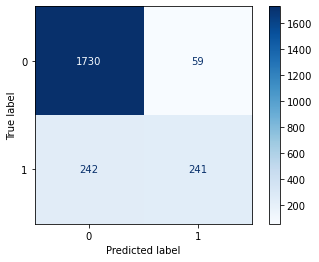

In [188]:
# Random Forest Tunned Model Confusion Matrix Train Set
print('Random Forest Train set Confusion Matrix')
disp = plot_confusion_matrix(RF_best, X_train_endmost, y_train_final, cmap='Blues')

Random Forest Test set Confusion Matrix


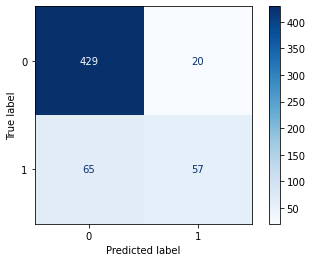

In [189]:
# Random Forest Tunned Model Confusion Matrix Test Set
print('Random Forest Test set Confusion Matrix')
disp = plot_confusion_matrix(RF_best, X_test_endmost, y_test, cmap='Blues')

Gradient Boost Train set Confusion Matrix


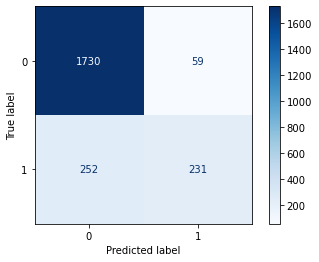

In [194]:
# Gradient Boost Base Model Confusion Matrix Train Set
print('Gradient Boost Train set Confusion Matrix')
disp = plot_confusion_matrix(GB_base, X_train_endmost, y_train_final, cmap='Blues')

Gradient Boost Test set Confusion Matrix


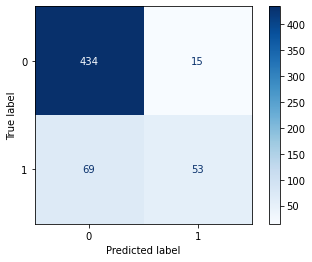

In [193]:
# Gradient Boost Base Model Confusion Matrix Test set
print('Gradient Boost Test set Confusion Matrix')
disp = plot_confusion_matrix(GB_base, X_test_endmost, y_test, cmap='Blues')

Statament :
<br>
1. As you can see from the model reports that Gradient Boost Base Model has more consistent results from train test report than Random Forest Tunned Model. Even though the Random Forest Tunned Model has an incredible report in train set, but imbalance report with the test set can lead Random Forest Tunned Model to over-fitting model.
2. Gradient Boost Base Model has more balance AUC score from their train and test set compared to Random Forest Tunned Model. Both have AUC scores above 75 which is good, but since the gap between train and test set of Gradient Boost Base Model is smaller than Random Forest Tunned Model, I can assumed that Gradient Boost Base Model is better than Random Forest Tunned Model.
3. From the confusion matrix, we can see that Gradient Boost Base Model prediction has a lower number of prediction errors than Random Forest Tunned Model in test set. While in train set, shows the opposite.
4. With all these statements, I conclude that Gradient Boost Base Model is the best model during this experiment.

### 8. Model Inference

In [196]:
# Split Inference Data to different type
data_inf_num = data_inf[num_raw]
data_inf_cat = data_inf[cat_raw]

In [197]:
# Scaling inference data
data_inf_num_scaled = scaler.transform(data_inf_num)

In [198]:
# Combine the scaled numerical inference data with categorical inference data
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat], axis=1)
data_inf_final_df = pd.DataFrame(data_inf_final, columns = [num_raw + cat_raw])
data_inf_fix = data_inf_final_df[final_features]

In [204]:
# Predict using Gradient Boost Base Model
GB_base_inf_pred_df = pd.DataFrame(GB_base.predict(data_inf_fix), columns = ['default_payment_next_month GB Predict'])

pd.concat([data_inf, GB_base_inf_pred_df], axis = 1)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,default_payment_next_month GB Predict
0,300000.0,1,3,1,53.0,-2,-2,-2,-2,-2,...,992.0,1205.0,0.0,0.0,583.0,992.0,1205.0,96.0,0,0
1,160000.0,2,1,1,29.0,-1,-1,-2,-1,-1,...,150.0,989.0,0.0,0.0,150.0,150.0,989.0,0.0,1,0
2,70000.0,2,1,2,27.0,0,0,0,0,-1,...,1223.0,70027.0,5000.0,1900.0,2000.0,1223.0,70027.0,2600.0,0,0
3,180000.0,2,1,2,27.0,0,0,0,0,0,...,49956.0,50133.0,5000.0,3371.0,6940.0,2800.0,2000.0,2000.0,0,0
4,100000.0,2,3,2,28.0,0,-1,-1,0,0,...,31410.0,20529.0,13695.0,49813.0,50054.0,33.0,10028.0,100000.0,0,0
5,20000.0,1,2,2,22.0,1,2,0,0,0,...,17366.0,17128.0,0.0,1736.0,1618.0,902.0,1000.0,869.0,0,0
6,200000.0,1,2,1,40.0,1,2,2,0,-1,...,201490.0,190721.0,5133.0,0.0,5857.0,202076.0,6726.0,5346.0,0,1
7,160000.0,2,2,1,49.0,0,0,0,0,0,...,19928.0,20445.0,4000.0,3000.0,1000.0,1000.0,1000.0,1000.0,0,0
8,70000.0,2,1,2,27.0,0,0,0,0,0,...,16345.0,21163.0,5000.0,20000.0,10000.0,6000.0,5000.0,8000.0,0,0
9,300000.0,1,1,1,38.0,-1,-1,-1,-1,-2,...,-918.0,-1209.0,200.0,600.0,0.0,0.0,0.0,1791.0,1,0


## Overall Analysis / Conclusions
1. columns that affect the income bracket significantly are limit_balance, pay_amt_2, pay_amt_6, pay_amt_1, pay_0, pay_2, pay_3. But since few of them had an unclear / extreme distribution ( which affect their outliers ), maybe it would be better if either manipulated columns with same distribution type or don't use them.
2. target have mild imbalance in their composition ( about 79:21 ), which mean imbalance data handling is better performed.
3. Even though Gradient Boost Base Model is considered as the best model tested so far, but since the Gradient Boost Base Model recall on 0 value score is very low, I can say that Gradient Boost Base Model is still unable to predict no status of default payment confidently / you can say it as under-fitting.
4. The way to improve the model prediction are:
- Either handling the outliers in extreme skewed distribution or don't use the columns.
- Handle the target imbalance with proper technique.
- Try another parameters within every model.
- Try another method of feature selection ( using Kendall's for numerical to categorical and Chi2 for categorical to categorical ).